# Imports

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# Defines

In [2]:
IMAGE_PATH = 'segment_nuclei_cnn.png'
MODEL_PATH = 'model_folder'

# Load image

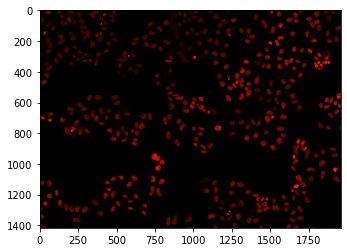

(1416, 1960, 3)

In [3]:
image = plt.imread(IMAGE_PATH)
plt.imshow(image)
plt.show()
image.shape

In [4]:
# If the input image is gray scale it would look like this
image = image[...,:1]
image.shape

(1416, 1960, 1)

# Add batch dimension
The model expects the first dimension to be the batch dimension. If the loaded array does not have a batch dimension we need to add one.

In [5]:
image = image[np.newaxis]
image.shape

(1, 1416, 1960, 1)

# Load the model

In [6]:
model = tf.keras.models.load_model(MODEL_PATH)

# Determine input shape required by the model and crop input image respectively

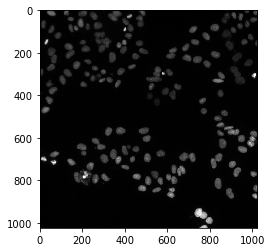

(1, 1024, 1024, 1)

In [7]:
height, width = model.signatures["serving_default"].inputs[0].shape[1:3]
image = image[:, :height, :width]
plt.imshow(image[0, ..., 0], cmap='gray')
plt.show()
image.shape

# Run prediction

In [8]:
prediction = model.predict(image)[0] # Removes batch dimension

# Plot prediction

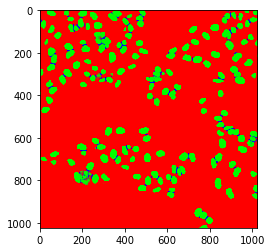

In [10]:
plt.imshow(prediction)
plt.show()

In [20]:
# Generate labels from one-hot encoded vectors
prediction_labels = np.argmax(prediction, axis=-1)
print(type(prediction_labels))
print(prediction_labels.min())
print(prediction_labels.max())
print(prediction_labels.shape)

<class 'numpy.ndarray'>
0
2
(1024, 1024)


In [18]:
# get pixel values for all classes from prediction
classes = np.unique(prediction_labels)
print(classes)

[0 1 2]


In [19]:
prediction_labels[prediction_labels]
print(type(prediction_labels))
print(prediction_labels.min())
print(prediction_labels.max())
print(prediction_labels.shape)

<class 'numpy.ndarray'>
0
2


In [31]:
background = 0
nuclei = 1
borders = 2

nuc = np.where(prediction_labels==nuclei, True, False)
print(type(nuc))

<class 'numpy.ndarray'>


In [44]:
cutout = [0, 0, 500, 1024]
startx = 0
starty = 0
width = 600
height = 1024
nuc_small = nuc[starty:height-1, startx:width-1]
print(nuc_small.shape)

(1023, 599)


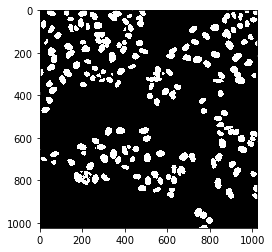

In [42]:
plt.imshow(nuc, cmap='gray')
#plt.imshow(prediction_labels, cmap='gray')
plt.show()

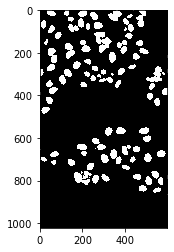

In [43]:
plt.imshow(nuc_small, cmap='gray')
#plt.imshow(prediction_labels, cmap='gray')
plt.show()